In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read in guardian test data 2020-2024
guardian = pd.read_csv('data/guardian_test_data_2020-2024.csv')

In [4]:
guardian.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,...,commentCloseDate,commentable,displayHint,liveBloggingNow,sensitive,starRating,scheduledPublicationDate,showTableOfContents,clean_text,womens_football
0,football/2020/dec/31/kolasinac-on-verge-of-sch...,article,football,Football,2020-12-31T22:30:04Z,Kolasinac joins Schalke on loan as Arteta targ...,https://www.theguardian.com/football/2020/dec/...,https://content.guardianapis.com/football/2020...,False,pillar/sport,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['mikel', 'arteta', 'has', 'revealed', 'arsena...",False
1,football/2020/dec/31/talented-charismatic-vola...,article,football,Football,2020-12-31T21:06:46Z,"Tommy Docherty: colourful, complex coach with ...",https://www.theguardian.com/football/2020/dec/...,https://content.guardianapis.com/football/2020...,False,pillar/sport,...,2021-01-03T21:00:00Z,True,NaN,NaN,NaN,NaN,NaN,NaN,"['tommy', 'docherty', 'spent', 'a', 'lifetime'...",False
2,football/2020/dec/31/tommy-docherty-obituary,article,football,Football,2020-12-31T20:42:14Z,Tommy Docherty obituary,https://www.theguardian.com/football/2020/dec/...,https://content.guardianapis.com/football/2020...,False,pillar/sport,...,2021-01-03T20:42:14Z,True,NaN,NaN,NaN,NaN,NaN,NaN,"['tommy', 'docherty', 'who', 'has', 'died', 'a...",False
3,football/ng-interactive/2020/dec/31/mens-trans...,interactive,football,Football,2020-12-31T20:00:49Z,Men's transfer window January 2021 – all deals...,https://www.theguardian.com/football/ng-intera...,https://content.guardianapis.com/football/ng-i...,False,pillar/sport,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['default'],False
4,football/2020/dec/31/kieran-trippier-suspensio...,article,football,Football,2020-12-31T19:33:39Z,Kieran Trippier's suspension by FA 'completely...,https://www.theguardian.com/football/2020/dec/...,https://content.guardianapis.com/football/2020...,False,pillar/sport,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['diego', 'simeone', 'has', 'described', 'the'...",False


In [19]:
# display column names
guardian['bodyText'][0]

'Mikel Arteta has revealed Arsenal’s priority in January is to trim the numbers in their squad. Sead Kolasinac is one of several players who have barely featured this season and the defender has joined Schalke on loan until the end of the campaign. “We have a large squad and we knew that,” Arteta said. “A lot of things that should have happened in the summer, we cannot accomplish for different reasons. There are some players that are going to go on loan and going to leave and that is the priority at the moment. We cannot sustain the numbers that we have in certain positions. Then we will see if we have the right opportunity in the positions where we need some more help.” Mesut Özil and Shkodran Mustafi are among others who do not feature in Arteta’s plans but one player the manager said he would like to keep is Reiss Nelson, whose absence from the squad in recent weeks fuelled speculation that he could be on the verge of a move. “He has not been 100% fit and that is the reason why he h

In [7]:
len(guardian)

16259

In [8]:
# check values could of womens_football column
guardian['womens_football'].value_counts()

womens_football
False    12759
True      3500
Name: count, dtype: int64

In [7]:
# create new column for data as a datetime object from webPublicationDate
guardian['date'] = pd.to_datetime(guardian['webPublicationDate'])

In [8]:
# find the earliest and latest date in the data
guardian['date'].min(), guardian['date'].max()

(Timestamp('2020-01-01 08:31:35+0000', tz='UTC'),
 Timestamp('2024-04-30 23:04:51+0000', tz='UTC'))

In [9]:
# create a new dummy for before and after july 2022
guardian['before_july_2022'] = np.where(guardian['date'] < '2022-07-01', 1, 0)

In [10]:
# now count values of womens_football column for before and after july 2022
guardian.groupby('before_july_2022')['womens_football'].value_counts()

before_july_2022  womens_football
0                 False              5400
                  True               1898
1                 False              7359
                  True               1602
Name: count, dtype: int64

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

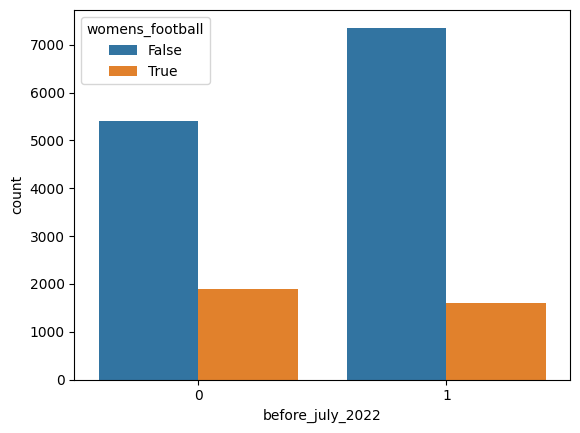

In [14]:
# create a graph should womens football articles before and after july 2022
sns.countplot(data=guardian, x='before_july_2022', hue='womens_football')

plt.show()

In [11]:
# create a column with month and year of the article with month first then year
guardian['month_year'] = guardian['date'].dt.strftime('%m-%Y')


In [12]:
# now count values of womens_football column for before and after july 2022 by month
guardian.groupby(['before_july_2022', 'month_year'])['womens_football'].value_counts()

before_july_2022  month_year  womens_football
0                 01-2023     False              255
                              True                43
                  01-2024     False              314
                              True                77
                  02-2023     False              221
                                                ... 
1                 11-2021     True                62
                  12-2020     False              225
                              True                46
                  12-2021     False              200
                              True                53
Name: count, Length: 104, dtype: int64

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

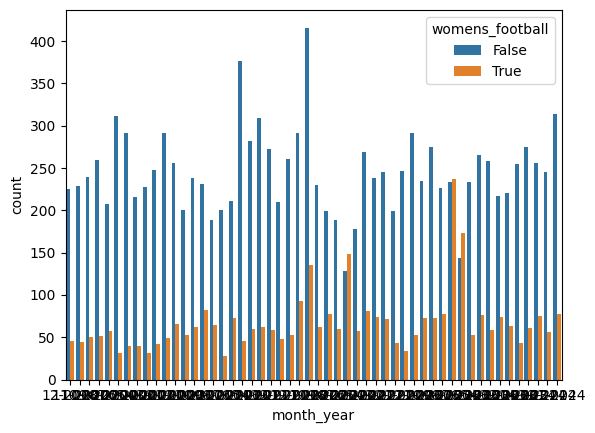

In [13]:
# create a graph should womens football articles before and after july 2022 by month
sns.countplot(data=guardian, x='month_year', hue='womens_football')

plt.show()

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

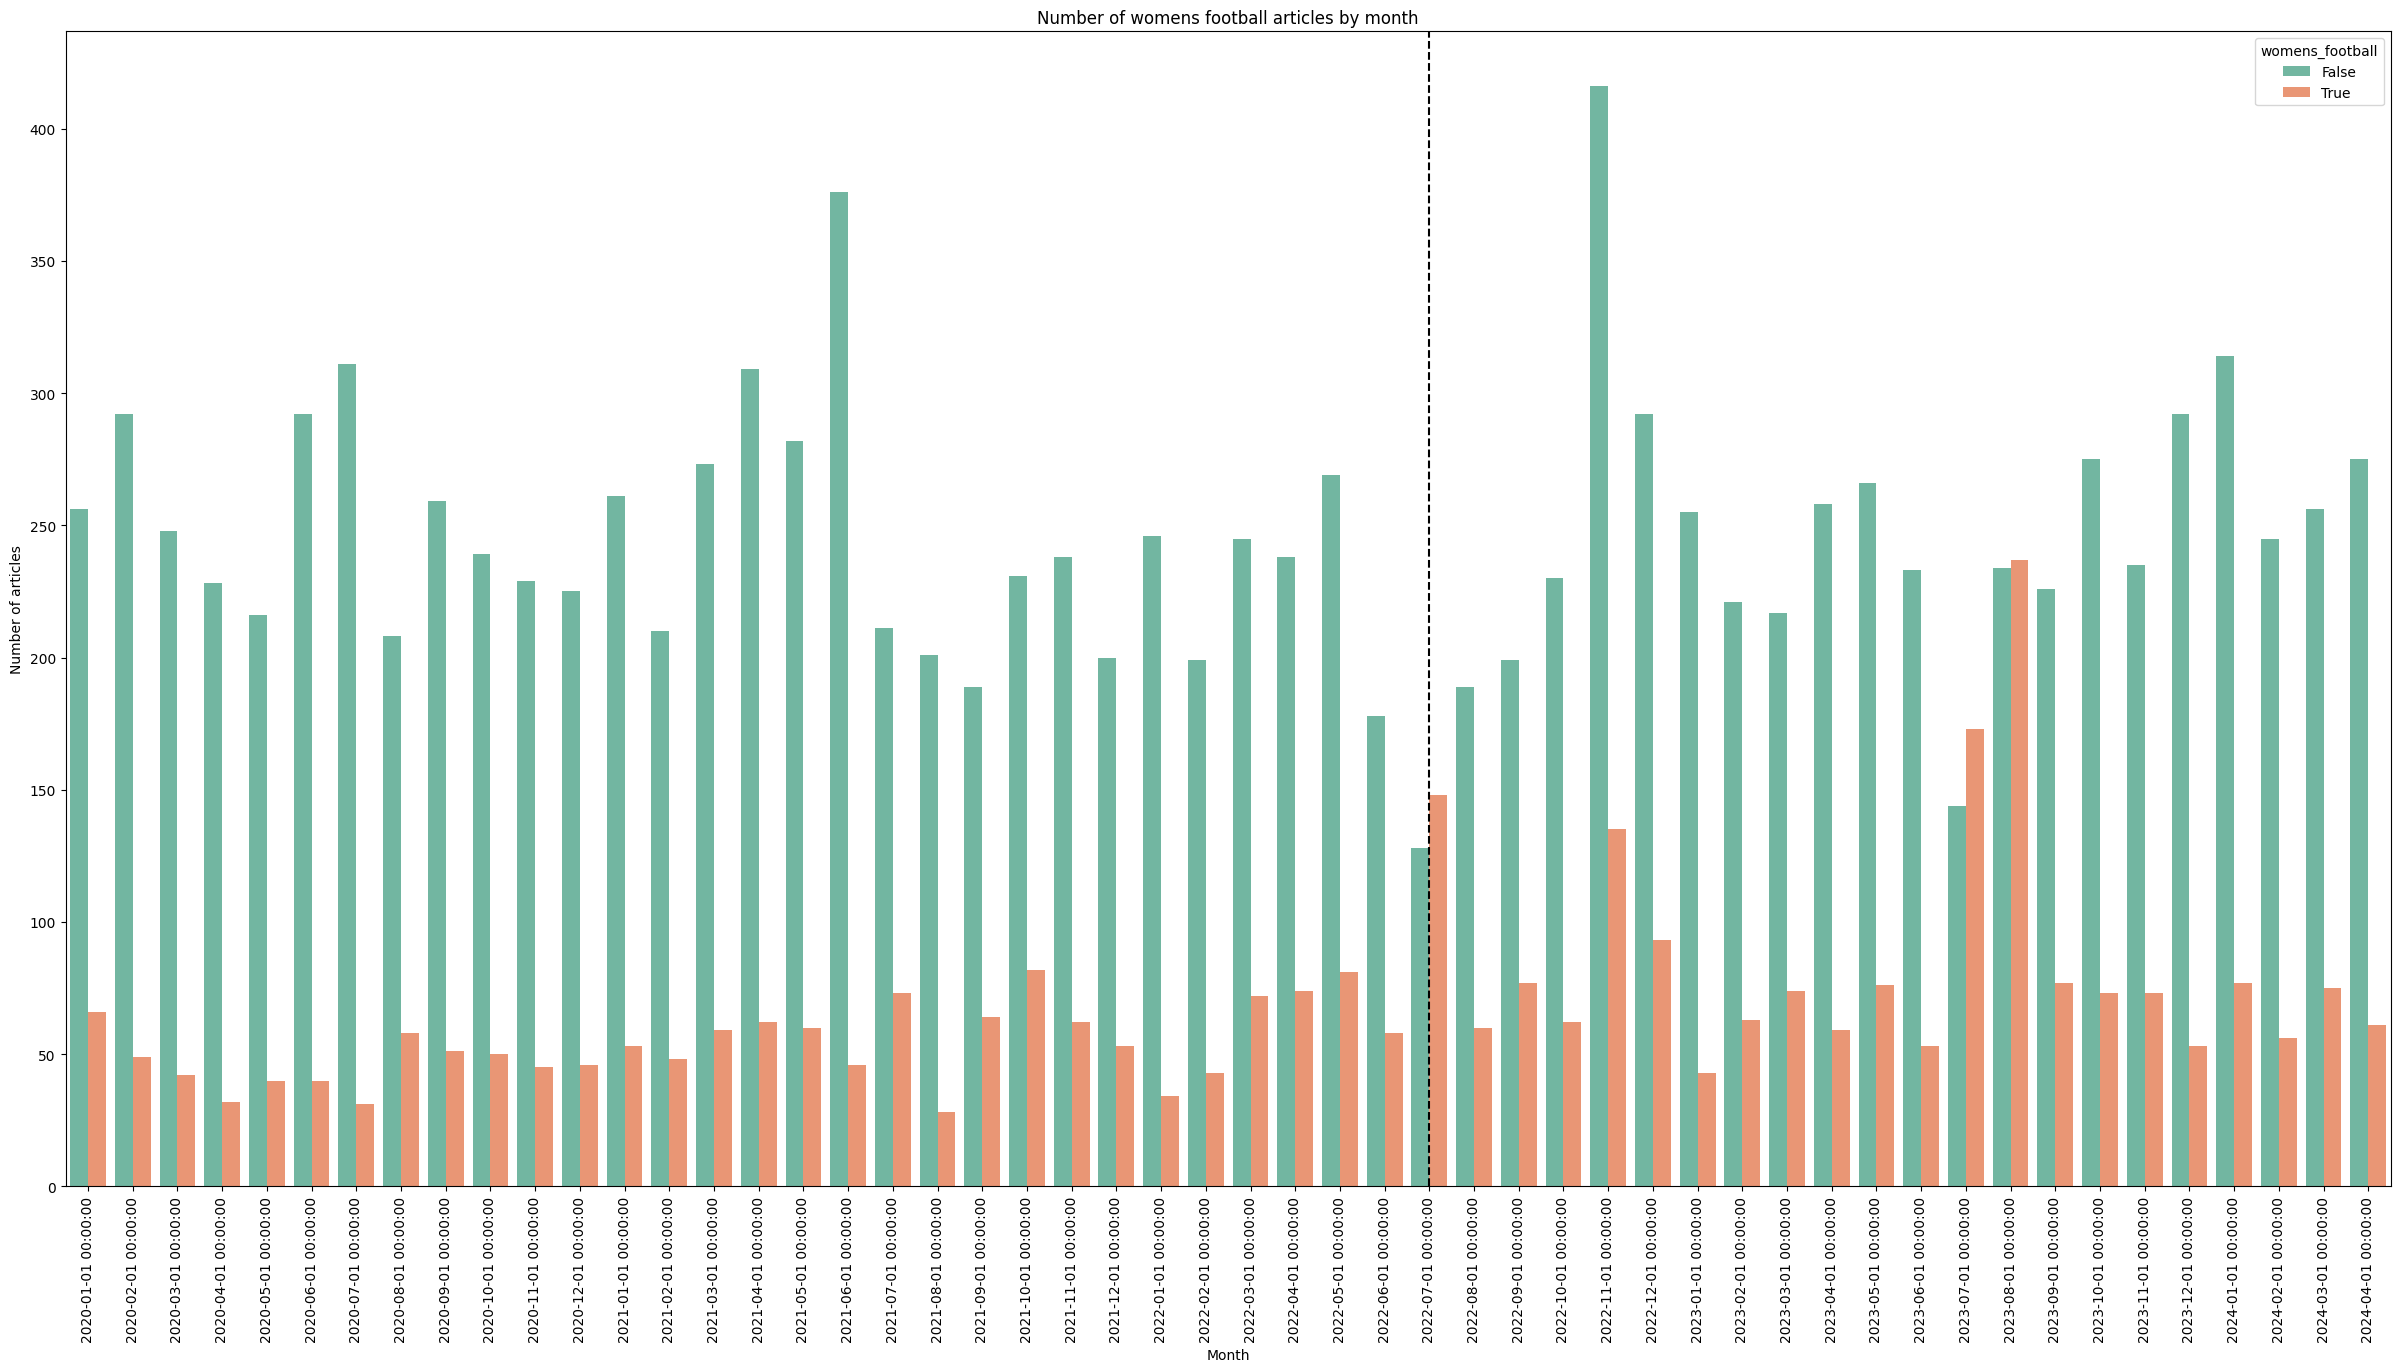

In [14]:
# make bigger
plt.figure(figsize=(30, 15))

# create a graph should womens football articles before and after july 2022 by month in chronological order

# sort the data by month_year by first converting to datetime
guardian['month_year'] = pd.to_datetime(guardian['month_year'], format='%m-%Y')

guardian = guardian.sort_values('month_year')

# create the plot
sns.countplot(data=guardian, x='month_year', hue='womens_football', palette='Set2')

# make x-axis labels vertical
plt.xticks(rotation=90)

# add a bold line at july 2022
plt.axvline(x=30, color='black', linestyle='--')

# format to make it look nice
plt.title('Number of womens football articles by month')
plt.xlabel('Month')
plt.ylabel('Number of articles')




plt.show()

<Figure size 3000x1500 with 0 Axes>

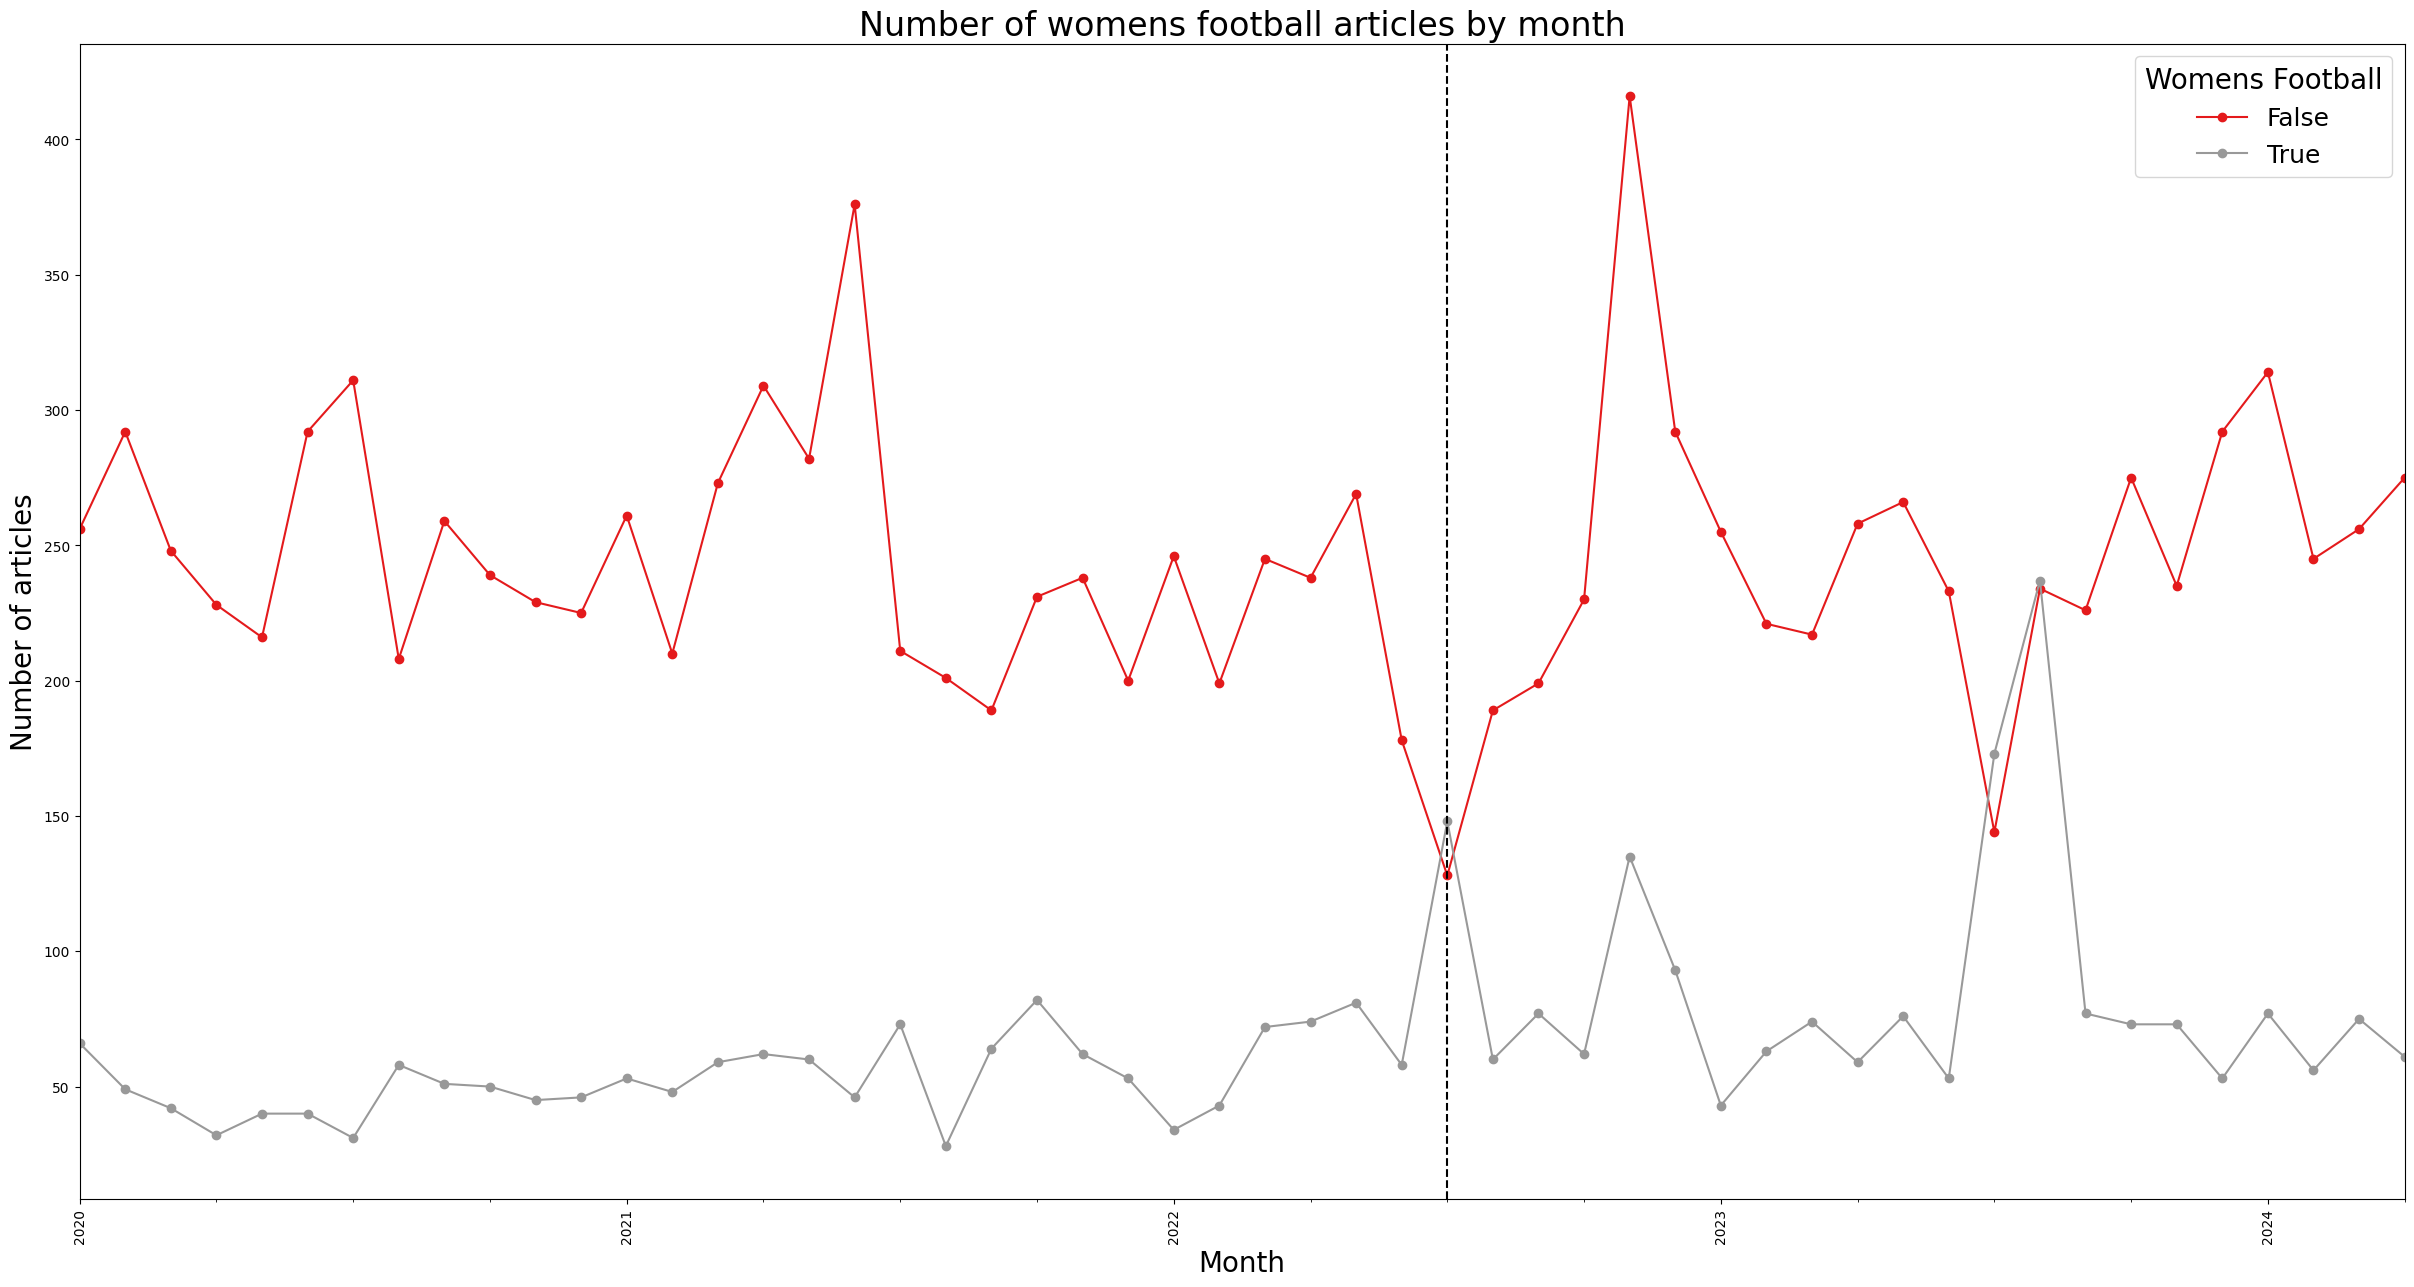

In [16]:
plt.figure(figsize=(30, 15))

# sort the data by month_year after converting to datetime (already done)
guardian['month_year'] = pd.to_datetime(guardian['month_year'], format='%m-%Y')
guardian = guardian.sort_values('month_year')

# count the number of articles per month and for each category (womens_football)
grouped_data = guardian.groupby(['month_year', 'womens_football']).size().unstack(fill_value=0)

# create a line plot instead of a bar plot
grouped_data.plot(kind='line', marker='o', figsize=(30, 15), colormap='Set1')

# add a bold line at July 2022
july_2022 = pd.to_datetime('07-2022', format='%m-%Y')
plt.axvline(x=july_2022, color='black', linestyle='--')

# customize the x-axis labels
plt.xticks(rotation=90)

# add titles and labels
plt.title('Number of womens football articles by month', fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of articles', fontsize=20)

# show the legend and make it larger
plt.legend(title='Womens Football', fontsize=18, title_fontsize=20)

plt.show()


In [6]:
# display article titles for womens football articles
guardian[guardian['womens_football'] == 1]['webTitle']

# in more readable format
for title in guardian[guardian['womens_football'] == 1]['webTitle']:
    print(title)



My crazy, challenging first year at Aston Villa has ended on a high | Eni Aluko
How did Leeds United not realise what would happen when they targeted a woman? | Suzanne Wrack
Leeds United condemn abuse of Karen Carney after club tweet mocked pundit
'It's tragic': Swedish women's champions dissolved after title win
Five Women's Super League rising stars to watch in 2021
The Kieran Trippier case and why some betting markets should not be allowed | Barry Glendenning
Farewell Jim McLean of Dundee United, Scottish football won't see his type again | Ewan Murray
Resilient W-League gears up for season start despite many challenges thrown at it | Samantha Lewis
From orphan to football agent: the remarkable journey of Michael Kallback
Women’s Super League: talking points from the weekend’s action
Manchester United 6-2 Leeds United: Premier League – as it happened
Tottenham v Leicester City: Premier League – live!
Arsenal 4-0 Everton: Women's Super League – as it happened
'It would kill me to be

In [4]:
# display article titles for mens football articles in more readable format for subset of data
for title in guardian[guardian['womens_football'] == 0]['webTitle'].head(1000):
    print(title)

Kolasinac joins Schalke on loan as Arteta targets Arsenal clearout
Tommy Docherty: colourful, complex coach with a formidable football brain | Ewan Murray
Tommy Docherty obituary
Men's transfer window January 2021 – all deals from Europe's top five leagues
Kieran Trippier's suspension by FA 'completely unjust', says Diego Simeone
Women's transfer window January 2021 – every deal in Europe's top five leagues
A-League and W-League unbundle from Football Australia in 'historic moment' for game
Newcastle 0-0 Liverpool: Premier League – as it happened
Manchester United 1-0 Wolves: Premier League – as it happened
Brighton 0-1 Arsenal, West Brom 0-5 Leeds and more – as it happened
José Mourinho praises Tanguy Ndombele for his 'big evolution' at Spurs
David Squires on … the endless joyride that was football in 2020
'Money isn't everything' – Fran Garagarza and the miracle of Eibar
Mauricio Pochettino an odd choice for PSG, a club where the individual is king | Jonathan Liew
Everton want answer